<a href="https://colab.research.google.com/github/gdepradd/machineLearningProject/blob/main/Age_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import library yang diperlukan
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import tensorflow_hub as hu

In [2]:
#Mengakses data gambar menggunakan pathlib dan cek nama label
data_directory = pathlib.Path('./drive/MyDrive/GDSC/Porto. Core/face_age')
class_names = [item.name for item in data_directory.glob('*')][:2]
print(class_names)

['Anak Anak', 'Dewasa']


In [3]:
#Membuat variabel yang berisi label dari data gambar
anak_dir = './drive/MyDrive/GDSC/Porto. Core/face_age/Anak Anak'
dewasa_dir = './drive/MyDrive/GDSC/Porto. Core/face_age/Dewasa'
data_dir ='./drive/MyDrive/GDSC/Porto. Core/face_age'

In [4]:
print(f'Number of Child images: {len(os.listdir(anak_dir))}')
print(f'Number of Adult images: {len(os.listdir(dewasa_dir))}')

Number of Child images: 3925
Number of Adult images: 2297


In [8]:
from sklearn.model_selection import train_test_split
import shutil

# Buat direktori baru untuk data tes
test_data_dir = 'path_to_your_test_data_dir'
if not os.path.exists(test_data_dir):
    os.makedirs(test_data_dir)

# Bagi data menjadi data pelatihan+validasi dan data tes
for class_dir in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        train_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

        # Pindahkan data tes ke direktori terpisah
        test_class_dir = os.path.join(test_data_dir, class_dir)
        if not os.path.exists(test_class_dir):
            os.makedirs(test_class_dir)
        for img in test_images:
            shutil.move(os.path.join(class_path, img), os.path.join(test_class_dir, img))

# Setelah memisahkan data tes, gunakan ImageDataGenerator untuk pelatihan+validasi dan tes secara terpisah
data_gen = ImageDataGenerator(rescale=1/255., validation_split=0.2)

train_data = data_gen.flow_from_directory(data_dir,
                                          target_size=(224, 224),
                                          batch_size=32,
                                          subset='training',
                                          class_mode='binary')
val_data = data_gen.flow_from_directory(data_dir,
                                        target_size=(224, 224),
                                        batch_size=32,
                                        subset='validation',
                                        class_mode='binary')

# Menggunakan ImageDataGenerator untuk data tes yang terpisah
test_data_gen = ImageDataGenerator(rescale=1/255.)
test_data = test_data_gen.flow_from_directory(test_data_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='binary')


Found 3982 images belonging to 2 classes.
Found 995 images belonging to 2 classes.
Found 1245 images belonging to 2 classes.


In [5]:
# #Menyiapkan dan membagi gambar menjadi training
# data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

# train_data = data_gen.flow_from_directory(data_dir,
#                                           target_size = (224, 224),
#                                           batch_size = 32,
#                                           subset = 'training',
#                                           class_mode = 'binary')
# val_data = data_gen.flow_from_directory(data_dir,
#                                         target_size = (224, 224),
#                                         batch_size = 32,
#                                         subset = 'validation',
#                                         class_mode = 'binary')

Found 4978 images belonging to 2 classes.
Found 1244 images belonging to 2 classes.


In [6]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [7]:
def plot_random_images():

    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 10))

    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == 14:
            break

    plt.tight_layout()
    plt.show()

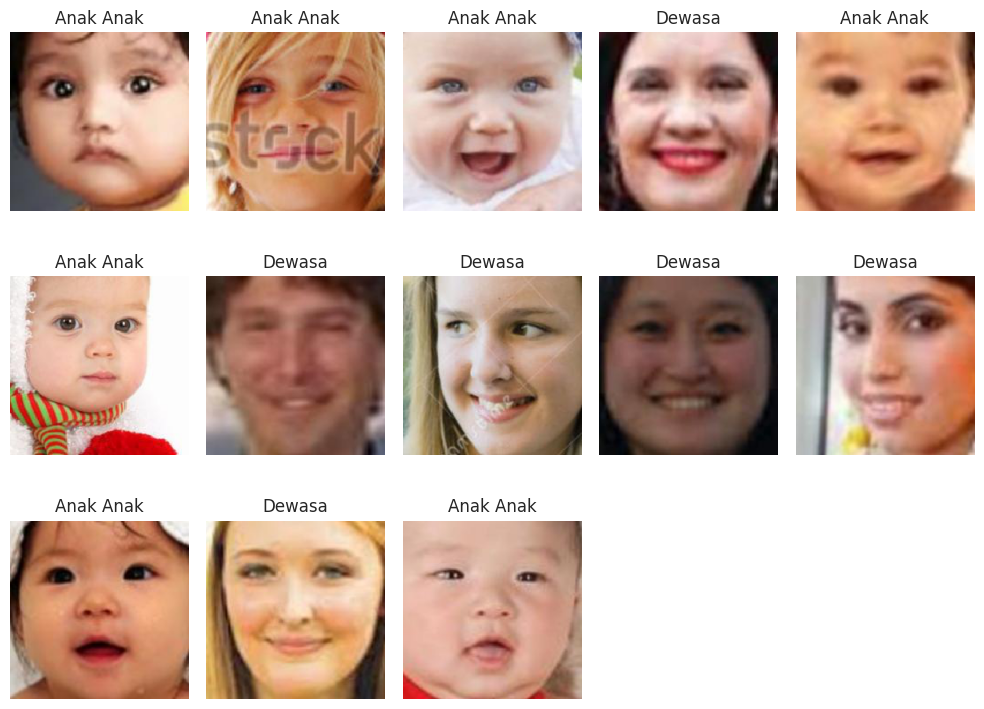

In [9]:
plot_random_images()

In [ ]:
train_data, val_data

(<keras.src.preprocessing.image.DirectoryIterator at 0x7a4d00c09cf0>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7a4c6ffcf1f0>)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Mendefinisikan model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Menyusun model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = images[0].shape),
    tf.keras.layers.Conv2D(32,(3,3),padding ='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(32,(3,3),padding ='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(2,activation = 'sigmoid'),

])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [13]:
# Melatih model
history = model.fit(train_data,
                    epochs=10,
                    validation_data=val_data)

Epoch 1/10
125/125 [==============================] - 948s 8s/step - loss: 0.5449 - accuracy: 0.7358 - val_loss: 0.3394 - val_accuracy: 0.8543
Epoch 2/10
125/125 [==============================] - 30s 243ms/step - loss: 0.3255 - accuracy: 0.8581 - val_loss: 0.3187 - val_accuracy: 0.8623
Epoch 3/10
125/125 [==============================] - 30s 237ms/step - loss: 0.2819 - accuracy: 0.8812 - val_loss: 0.3034 - val_accuracy: 0.8804
Epoch 4/10
125/125 [==============================] - 30s 243ms/step - loss: 0.2521 - accuracy: 0.8900 - val_loss: 0.3040 - val_accuracy: 0.8714
Epoch 5/10
125/125 [==============================] - 30s 237ms/step - loss: 0.2167 - accuracy: 0.9126 - val_loss: 0.2629 - val_accuracy: 0.9025
Epoch 6/10
125/125 [==============================] - 31s 249ms/step - loss: 0.1719 - accuracy: 0.9289 - val_loss: 0.2853 - val_accuracy: 0.8905
Epoch 7/10
125/125 [==============================] - 30s 237ms/step - loss: 0.1630 - accuracy: 0.9342 - val_loss: 0.2824 - val_accu

In [14]:
# Mengevaluasi model pada data tes
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')


39/39 [==============================] - 5s 119ms/step - loss: 0.3708 - accuracy: 0.8819
Test accuracy: 0.8819277286529541


In [ ]:
model.evaluate(val_data)

39/39 [==============================] - 30s 745ms/step - loss: 0.5223 - accuracy: 0.8553


[0.5222910642623901, 0.8553054928779602]

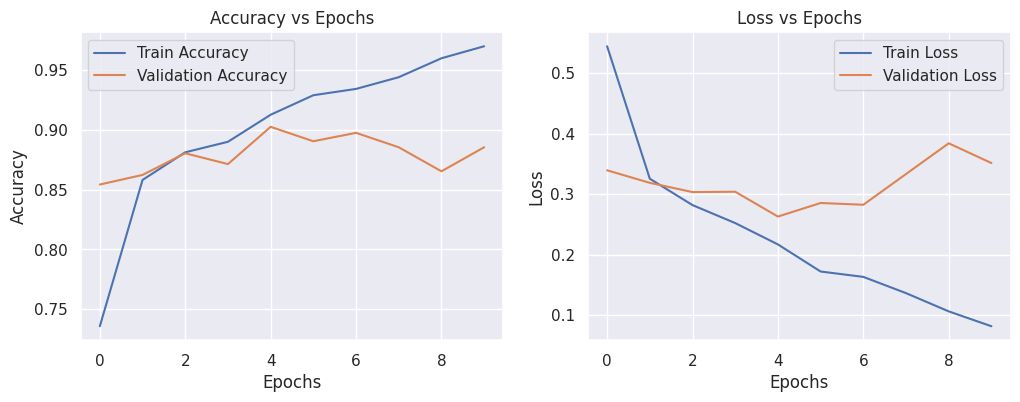

In [16]:
import matplotlib.pyplot as plt

# Plotting akurasi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.show()



In [17]:
#Menyimpan model
model.save('modelusia')

In [18]:
#Load model
loaded_model = tf.keras.models.load_model('modelusia')

In [19]:
#membuat fungsi untuk memproses data gambar yang akan di masukkan
from keras.src.layers.preprocessing import image_preprocessing
def preprocessed_images(path):
  img = image.load_img(path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis =0)
  img_preprocessed = img_array / 225.0
  return img_preprocessed

In [20]:
# Test
img_test_path = './drive/MyDrive/Colab Notebooks/gweh.jpeg'
img = preprocessed_images(img_test_path)
prediction = loaded_model.predict(img)
predicted_class_index = np.argmax(prediction)
class_labels =  ['Dewasa', 'Anak Anak']
predicted_class_label = class_labels[predicted_class_index]




1/1 [==============================] - 0s 335ms/step


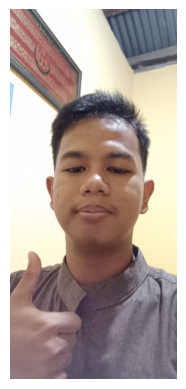

Prediksi status :  Dewasa


In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
gambar = mpimg.imread(img_test_path)
plt.imshow(gambar)
plt.axis('off')
plt.show()
print('Prediksi status : ', predicted_class_label)